# Exploring Dandiset 001433: Breathing rhythm and place dataset

**AI-Generated Content Warning:** This notebook was generated by an AI model and has not been fully verified. Users should exercise caution and independently verify the code and interpretations before relying on the results.

## Overview of Dandiset 001433

This notebook explores Dandiset 001433, titled "Breathing rhythm and place dataset", version 0.250507.2356. The dataset contains behavioral and electrophysiological data, specifically sniffing, video, and olfactory bulb electrophysiology recordings in freely-behaving mice.

Dandiset Link: https://dandiarchive.org/dandiset/001433/0.250507.2356

## Notebook Summary

This notebook will guide you through:

- Loading Dandiset 001433 using the DANDI API.
- Listing and inspecting assets within the Dandiset.
- Loading an NWB file from the Dandiset.
- Exploring the metadata and structure of the NWB file.
- Loading and visualizing electrophysiology (LFP) and sniff signal data.
- Summarizing initial observations and suggesting future analyses.

## Required Packages

The following Python packages are required to run this notebook:

- `dandi`
- `pynwb`
- `h5py`
- `remfile`
- `numpy`
- `matplotlib`
- `seaborn`

Please ensure these packages are installed in your environment. This notebook does not include installation instructions.


## Loading the Dandiset and Listing Assets

We will use the `dandiapi` client to connect to the DANDI archive and access the Dandiset. We will then list the first few assets to get an idea of the included files.

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001433", "0.250507.2356")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Breathing rhythm and place dataset
Dandiset URL: https://dandiarchive.org/dandiset/001433/0.250507.2356

First 5 assets:
- sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb (ID: 63d19f03-2a35-48bd-a54f-9ab98ceb7be2)
- sub-4122/sub-4122_ses-20250507T152930_ecephys.nwb (ID: cce2f86c-2440-4358-8298-75cb2faa83f1)
- sub-4122/sub-4122_ses-20250507T152933_ecephys.nwb (ID: 154a5db2-9bad-48b9-bbe4-13376c315cbe)
- sub-4127/sub-4127_ses-20250507T152941_ecephys.nwb (ID: 8a2c176c-846d-432c-9c7b-cfd0cefa40cb)
- sub-4127/sub-4127_ses-20250507T152953_ecephys.nwb (ID: ba3b58b3-38ff-49d4-bc73-2105c87ecf49)


## Loading an NWB File

We will load one of the NWB files from the Dandiset to examine its contents. We'll use the `pynwb` library along with `remfile` and `h5py` to access the remote file. Note that we are hardcoding the URL obtained using the `tools_cli.py nwb-file-info` command for the file `sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb`.

In [2]:
import pynwb
import h5py
import remfile

# Load
url = "https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Exploring NWB File Contents

Let's inspect some of the high-level metadata and contents of the loaded NWB file.

In [3]:
print(f"Session Description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Experimenter: {nwb.experimenter}")
print(f"Keywords: {list(nwb.keywords)}")
print(f"Institution: {nwb.institution}")
print(f"Lab: {nwb.lab}")
print(f"Experiment Description: {nwb.experiment_description}")

Session Description: LFP and sniff recording
Identifier: 4122_4
Session Start Time: 2025-05-07 15:29:27.359523-07:00
Experimenter: ('Rafilson, Sidney',)
Keywords: ['olfactory bulb', 'LFP', 'sniffing', 'mouse', 'neuroscience']
Institution: University of Oregon
Lab: Smear lab
Experiment Description: LFP and sniff behavior recording


The NWB file contains `acquisition` and `processing` modules.

In [4]:
print("Acquisition keys:", list(nwb.acquisition.keys()))
print("Processing keys:", list(nwb.processing.keys()))

Acquisition keys: ['LFP', 'SniffSignal']
Processing keys: ['behavior']


Let's look at the `LFP` and `SniffSignal` data in the `acquisition` module.

In [5]:
lfp_data = nwb.acquisition['LFP']
sniff_signal = nwb.acquisition['SniffSignal']

print(f"\nLFP Data:")
print(f"  Description: {lfp_data.description}")
print(f"  Unit: {lfp_data.unit}")
print(f"  Rate: {lfp_data.rate}")
print(f"  Data shape: {lfp_data.data.shape}")

print(f"\nSniff Signal:")
print(f"  Description: {sniff_signal.description}")
print(f"  Unit: {sniff_signal.unit}")
print(f"  Rate: {sniff_signal.rate}")
print(f"  Data shape: {sniff_signal.data.shape}")


LFP Data:
  Description: LFP signal from olfactory bulb
  Unit: volts
  Rate: 1000.0
  Data shape: (1969184, 16)

Sniff Signal:
  Description: Raw sniff thermistor voltage
  Unit: volts
  Rate: 1000.0
  Data shape: (1969184,)


The `processing` module contains behavior data, specifically `exhalation_time` and `inhalation_time`.

In [6]:
behavior_data = nwb.processing['behavior']
print("\nBehavior data interfaces keys:", list(behavior_data.data_interfaces.keys()))

exhalation_time = behavior_data.data_interfaces['exhalation_time']
inhalation_time = behavior_data.data_interfaces['inhalation_time']

print(f"\nExhalation Time:")
print(f"  Description: {exhalation_time.description}")
print(f"  Timestamps shape: {exhalation_time.timestamps.shape}")

print(f"\nInhalation Time:")
print(f"  Description: {inhalation_time.description}")
print(f"  Timestamps shape: {inhalation_time.timestamps.shape}")


Behavior data interfaces keys: ['exhalation_time', 'inhalation_time']

Exhalation Time:
  Description: exhalation_time (s)
  Timestamps shape: (10030,)

Inhalation Time:
  Description: inhalation_time (s)
  Timestamps shape: (10030,)


There is also metadata about the electrodes used for recording.

In [7]:
electrode_table = nwb.electrodes.to_dataframe()
print("\nElectrode Table:")
print(electrode_table.head())


Electrode Table:
          location                                              group  \
id                                                                      
0   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x137...   
1   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x137...   
2   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x137...   
3   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x137...   
4   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x137...   

   group_name filtering  
id                       
0    LFPGroup      none  
1    LFPGroup      none  
2    LFPGroup      none  
3    LFPGroup      none  
4    LFPGroup      none  


Neurosift Link for this NWB file:
https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/&dandisetId=001433&dandisetVersion=draft

## Visualizing Data

Let's visualize a short segment of the LFP and Sniff Signal data. We will load a small subset of data to avoid excessive memory usage and network transfer. We will load the first 10000 time points (which corresponds to 10 seconds of data given the 1000 Hz rate).

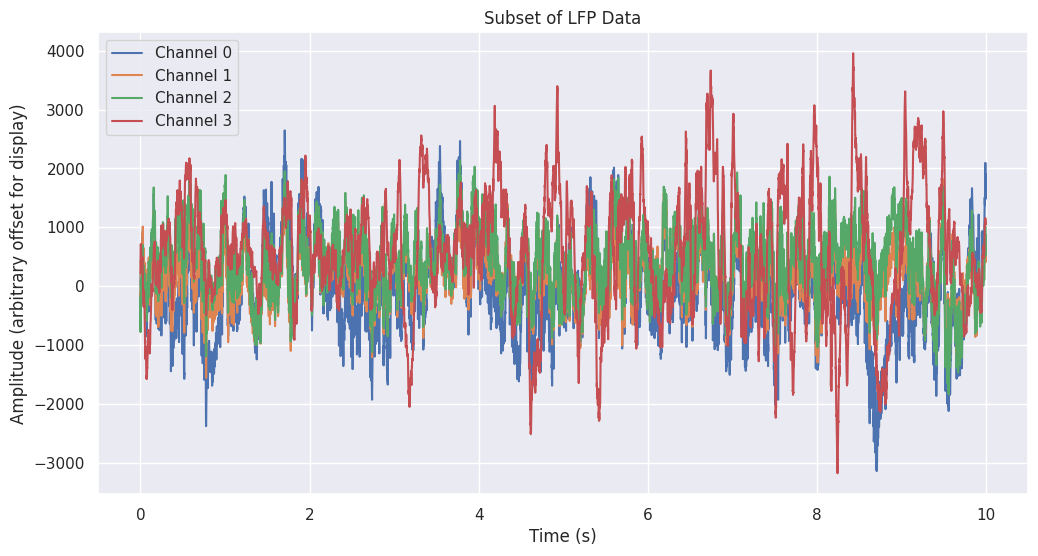

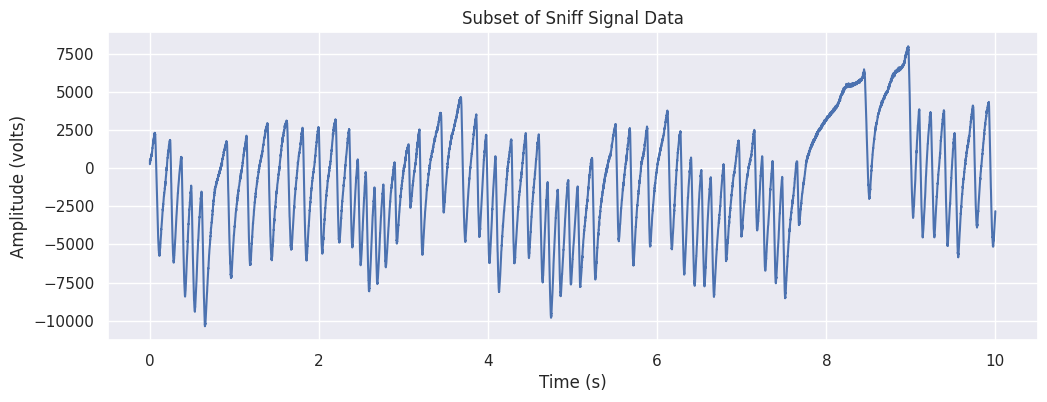

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Load a subset of LFP data (first 10000 time points for all channels)
lfp_subset = lfp_data.data[0:10000, :]
lfp_timestamps = (np.arange(lfp_subset.shape[0]) / lfp_data.rate) + lfp_data.starting_time

# Load a subset of Sniff Signal data (first 10000 time points)
sniff_subset = sniff_signal.data[0:10000]
sniff_timestamps = (np.arange(sniff_subset.shape[0]) / sniff_signal.rate) + sniff_signal.starting_time

# Plot LFP data for a few channels
plt.figure(figsize=(12, 6))
for i in range(min(lfp_subset.shape[1], 4)): # Plot up to 4 channels
    plt.plot(lfp_timestamps, lfp_subset[:, i] + i * 200, label=f'Channel {i}') # Offset for clarity
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (arbitrary offset for display)')
plt.title('Subset of LFP Data')
plt.legend()
plt.grid(True)
plt.show()

# Plot Sniff Signal data
plt.figure(figsize=(12, 4))
plt.plot(sniff_timestamps, sniff_subset)
plt.xlabel('Time (s)')
plt.ylabel(f'Amplitude ({sniff_signal.unit})')
plt.title('Subset of Sniff Signal Data')
plt.grid(True)
plt.show()

## Combined Visualization

Let's plot the LFP data from a single channel and the Sniff Signal on the same time axis to observe any potential correlations. We'll use data from channel 0 for simplicity.

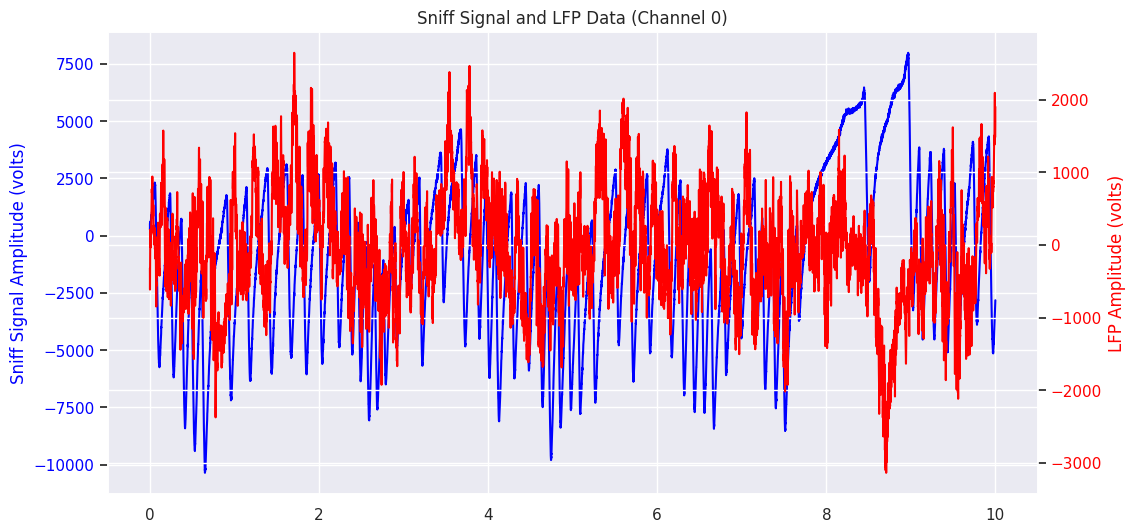

In [9]:
# Select a single LFP channel (channel 0)
lfp_channel_0 = lfp_subset[:, 0]

plt.figure(figsize=(12, 6))

# Plot Sniff Signal
plt.plot(sniff_timestamps, sniff_subset, label='Sniff Signal', color='blue')
plt.ylabel(f'Sniff Signal Amplitude ({sniff_signal.unit})', color='blue')
plt.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for LFP data
ax2 = plt.gca().twinx()
ax2.plot(lfp_timestamps, lfp_channel_0, label='LFP Channel 0', color='red')
ax2.set_ylabel(f'LFP Amplitude ({lfp_data.unit})', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.xlabel('Time (s)')
plt.title('Sniff Signal and LFP Data (Channel 0)')
plt.grid(True)
plt.show()

## Summary and Future Directions

This notebook demonstrated how to access Dandiset 001433, load an NWB file, and visualize subsets of the LFP and Sniff Signal data. The initial visualizations suggest a potential relationship between sniffing behavior and olfactory bulb LFP activity.

Future analysis could involve:

- Analyzing the entire LFP and Sniff Signal datasets.
- Investigating the precise timing relationship between sniff cycles and LFP oscillations.
- Exploring the spatial distribution of LFP activity across different channels.
- Incorporating video data to correlate behavior with neural activity.
- Utilizing the exhalation and inhalation timing information for more precise analysis of sniff-locked activity.
- Analyzing the power spectrum of the LFP data.

Remember to explore the Neurosift link provided earlier for interactive visualization of the NWB file.


In [10]:
# Close the NWB file
io.close()
h5_file.close()